#  Cardiovascular Disease Project:
The dataset  presents 70,000 data separated into 12 distinct characteristics, such as age, gender, blood pressure, cholesterol, smoker or non-smoker, etc.

**The target class will be 'cardio', which will be described as: '0' when the patient is healthy and '1' when the patient has cardiovascular disease.**

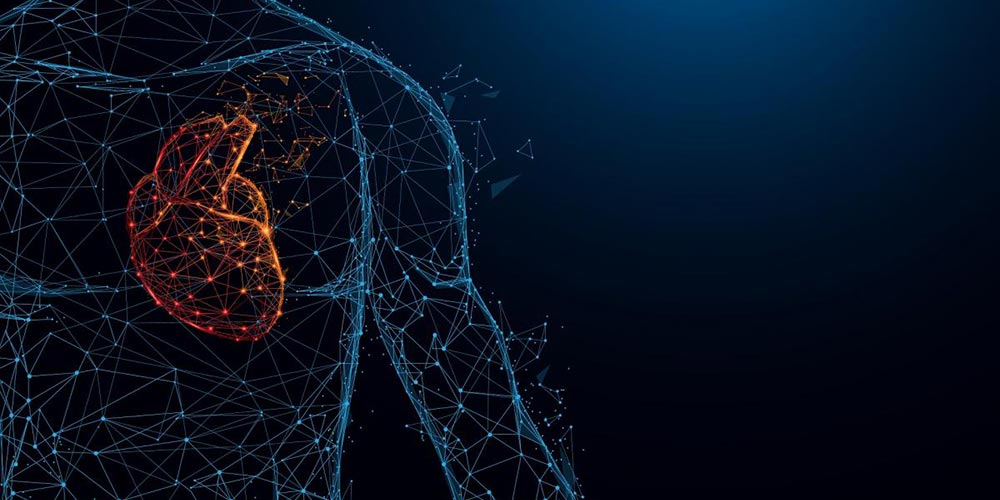

## Data Description
1. **Age** | Objective Feature | age | int (days)
2. **Height** | Objective Feature | height | int (cm) |
3. **Weight** | Objective Feature | weight | float (kg) |
4. **Gender** | Objective Feature | gender | categorical code | 1:woman 2: man
5. **Systolic blood pressure** | Examination Feature | ap_hi | int |
6. **Diastolic blood pressur**e | Examination Feature | ap_lo | int |
7. **Cholesterol** | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. **Glucose** | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. **Smoking** | Subjective Feature | smoke | binary |
10. **Alcohol intake** | Subjective Feature | alco | binary |
11.**Physical activity** | Subjective Feature | active | binary |
12. **Presence or absence of cardiovascular disease** | Target Variable | cardio | 1: disease 0: no|

# 1. Import Libraries

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import plotly
import plotly.graph_objs as go
import plotly.offline as py

# Ignorar warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# 2. Loading data

In [5]:
n = None
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos_pessoais_DS/Cardio_vascular_project/cardio_disease_dataset.csv', delimiter = ';', nrows = n)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# 2.1 Data Description

In [6]:
#Data dimension

print("Number of rows: {}".format(df.shape[0]));
print("Number of columns: {}".format(df.shape[1]))
df.info()

Number of rows: 70000
Number of columns: 13
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
#Checking for null data
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# 3. Data Cleaning and Preprocessing

In [8]:
# First, for better analysis we will convert the unit in 'days to 'years' from the 'age' column

df['age'] = df['age'].apply(lambda x: x/365)

df['age'] = df['age'].astype(int)

In [9]:
# Drop the ID column
df = df.drop('id', axis = 1)

Important to analyze the **descriptive statistics** of the dataset, the following formula
returns important values from the dataset per variable, such as:
mean, standard deviation, maximum and minimum value.

In [10]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


If we look in more detail at the table above it is possible to observe **some values that could be an error or outlier that will hinder future analyses.**

For example:
        1. minimum height is as 55 cm
        2. minimum weight is 10kg
        3. minimum systolic and diastolic pressure are negative
        4. It is important to check if there is any data where the diastolic is higher than the systolic, which is **impossible** to occur.

We can say that it is an **error**, because the minimum age of the dataset is **29 years**.
Thus, it is important to treat the outliers before starting a more in-depth analysis:

In [11]:
# Detection and removal of outliers by the Interquartile Range (IQR) approach

def remove_outlier(col):

    Q1 = np.percentile(df[col], 25,
                  interpolation = 'midpoint')
    Q3 = np.percentile(df[col], 75,
                  interpolation = 'midpoint')
    IQR = Q3 - Q1
    print('Old Shape: ', df.shape)

    upper = np.where(df[col] >= (Q3+1.5*IQR))
    lower = np.where(df[col] <= (Q1-1.5*IQR))

    # Remove outliers
    df.drop(upper[0], inplace = True)
    df.drop(lower[0], inplace = True)
    print ('New Shape: ', df.shape)

In [12]:
remove_outlier('height')

Old Shape:  (70000, 12)
New Shape:  (69481, 12)


**We will use another method to deal with outliers in systolic and diastolic pressure:**

  1. diastolic and systolic pressure cannot be negative values;
  2. diastolic pressure cannot be greater than systolic pressure:

In [47]:
# Analyzing the variables 'ap_hi' and 'ap_lo'
print('Systolic pressure is higher than diastolic pressure in {0} cases'.format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Systolic pressure is higher than diastolic pressure in 0 cases


In [14]:
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

print("Systolic pressure is higher than diastolic pressure in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Systolic pressure is higher than diastolic pressure in 0 cases


# 3.1 Feature Engineering

With the weight and height variables in hand, it will be interesting for analysis to **create the 'BMI' column.**
It is known that BMI may have a strong correlation with cardiovascular disease.

Normal BMI values range from **18.5 to 25.**

In [15]:
df['BMI'] = df['weight']/((df['height']/100)**2)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


# 4. Exploratory Data Analysis

In [16]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,65708.000000,65708.000000,65708.000000,65708.000000,65708.000000,65708.00000,65708.000000,65708.000000,65708.000000,65708.000000,65708.000000,65708.000000,65708.000000
mean,52.860489,1.348633,164.465940,74.043265,126.245313,81.18430,1.361204,1.224113,0.087250,0.052809,0.803905,0.492725,27.406913
std,6.759225,0.476541,7.580947,14.029845,14.457192,8.39941,0.677379,0.570927,0.282203,0.223654,0.397044,0.499951,5.119358
min,29.000000,1.000000,143.000000,11.000000,100.000000,60.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.298488
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.110279
max,64.000000,2.000000,186.000000,200.000000,170.000000,100.00000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,68.308315


## 4.1 Target Distribution

   To start the exploratory analysis it is important to check if the data for the target variable 'cardio' are balanced in the dataset, since unbalanced data can lead to problems when building models and generating predictions.

   **Checking the distribution of the variable 'cardio' in the dataset:**


In [17]:
# Get a count of the number of individuals with cardio
display(df['cardio'].value_counts())

# Calculate the percentage of individuals with heart disease
heart_disease_percentage = (df[df.cardio == 1].shape[0] / df.shape[0]) * 100

# Display the percentage
display('Patients with heart disease represent {:.2f}% of the dataset.'.format(heart_disease_percentage))


0    33332
1    32376
Name: cardio, dtype: int64

'Patients with heart disease represent 49.27% of the dataset.'

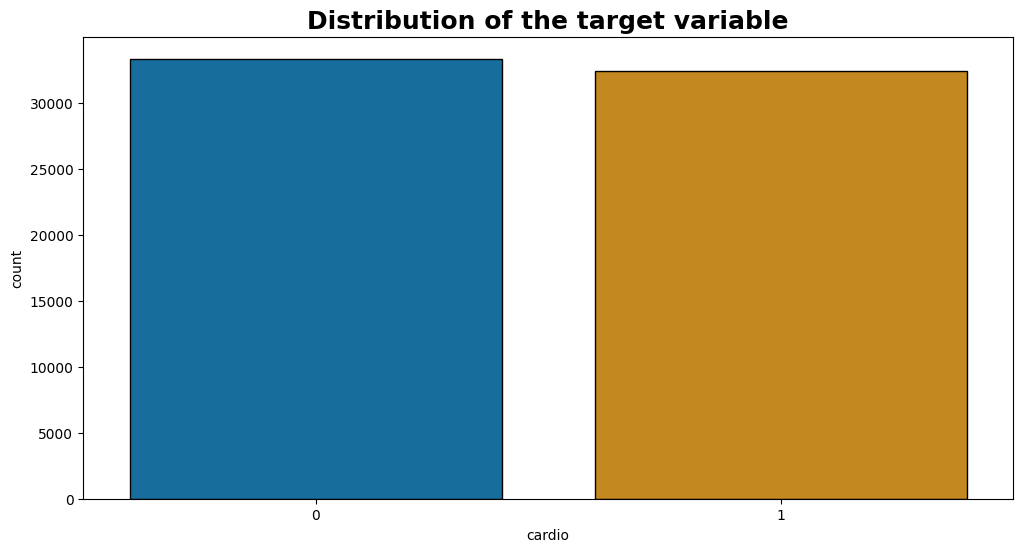

In [18]:
# visualize the amount of cardio disease in the dataset
# We can say that the target variable is balanced across the dataset

plt.figure(figsize=(12,6))
fig = sns.countplot(x='cardio', data=df, palette='colorblind', edgecolor='black')

fig.set_title('Distribution of the target variable', fontsize = 18, weight = 'bold');

## 4.2 Analyzing if there is a relationship between Age and the presence of Cardiovascular disease.

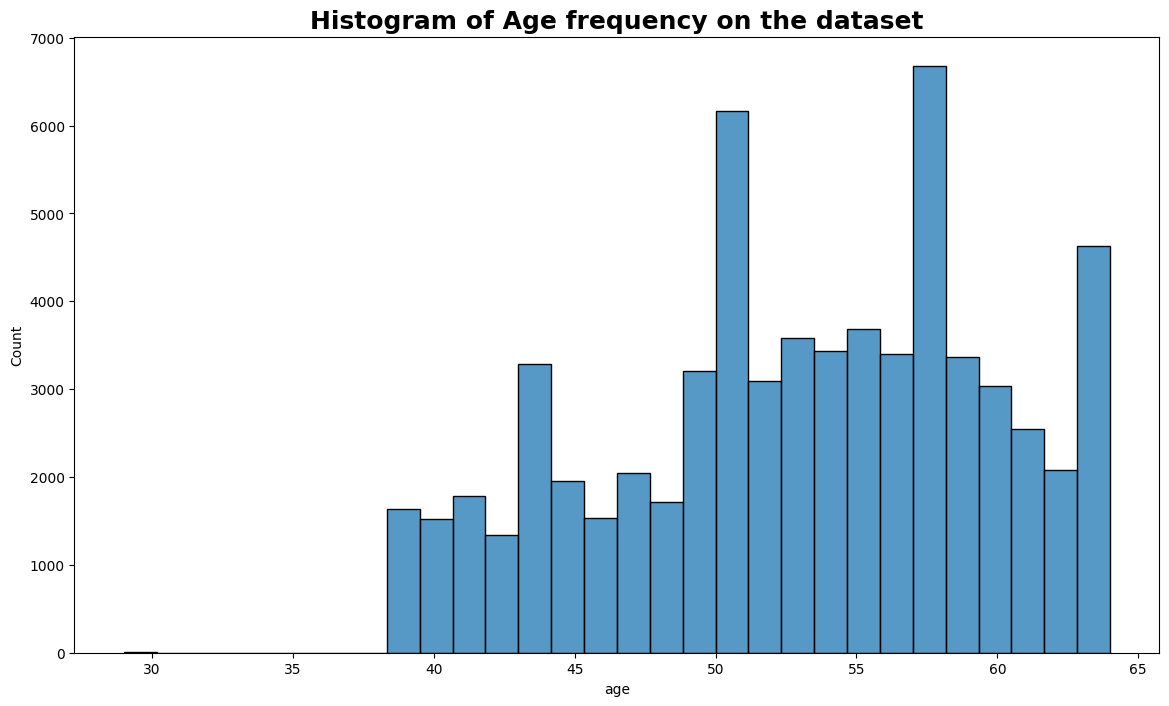

In [19]:
#Age frequency on the dataset

plt.figure(figsize=(14,8))
plt.title('Histogram of Age frequency on the dataset', fontsize = 18, weight = 'bold')

sns.histplot(data=df, x = 'age', bins = 30, edgecolor ='black');

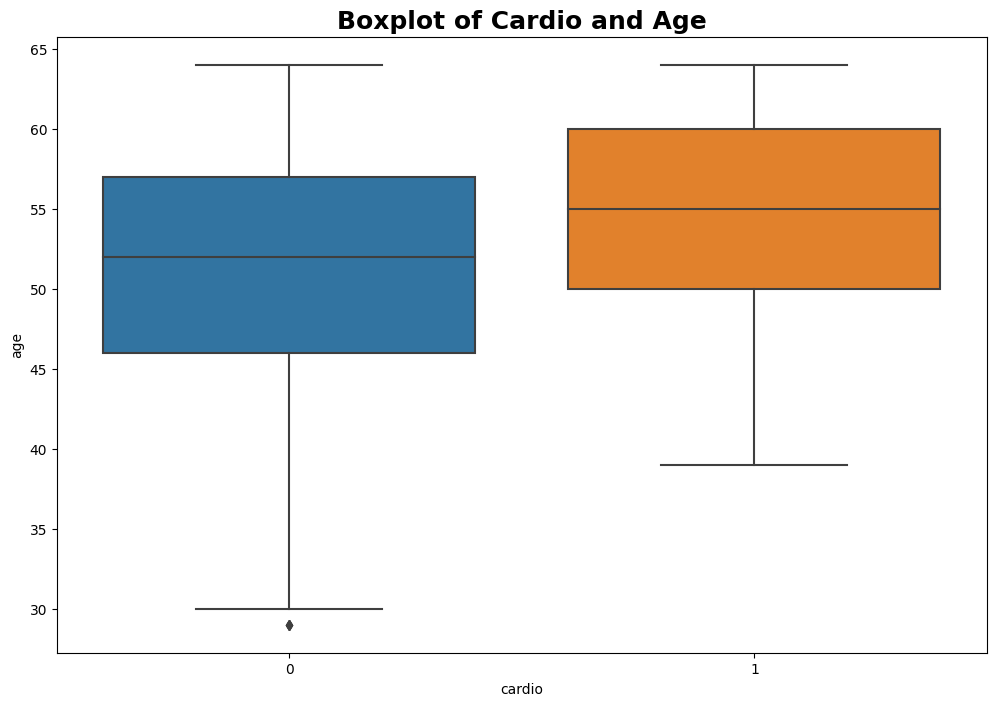

In [20]:
# Boxplot: Target x Age
plt.figure(figsize=(12,8))
plt.title('Boxplot of Cardio and Age', fontsize = 18, weight = 'bold')

sns.boxplot(x="cardio", y="age", data=df);

The representation below clearly demonstrates that there is an **inversion in the representation of the data, where after the age of 55, the sample of patients with heart disease is larger than that of patients without heart disease.**

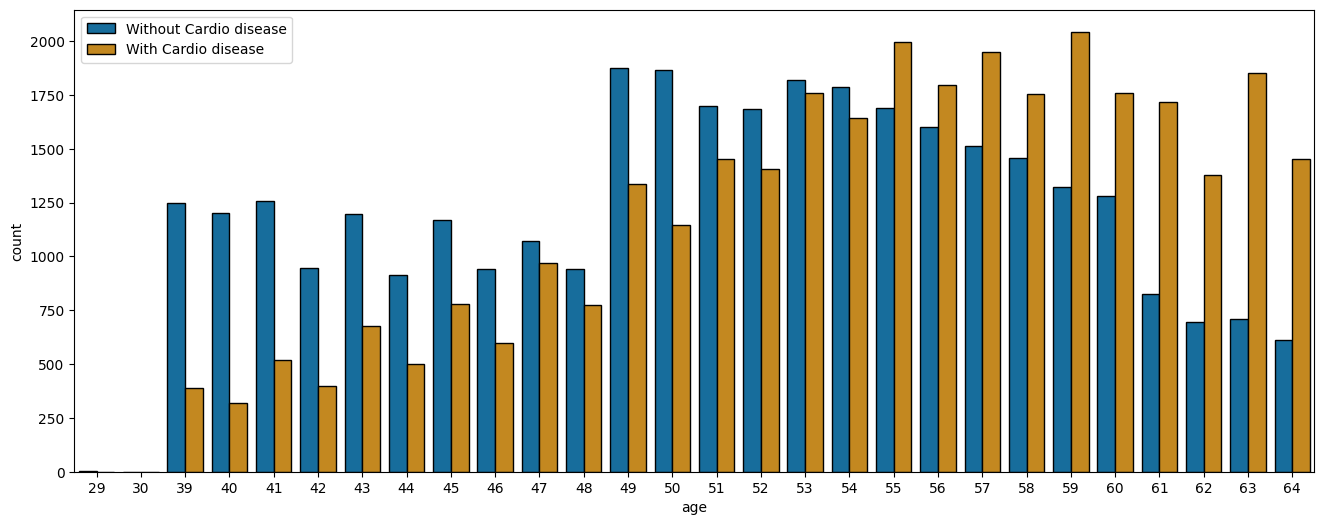

In [21]:
# Age x Cardio

plt.figure(figsize=(16,6))
fig = sns.countplot(x='age', hue='cardio', data=df,
                    palette='colorblind',
                    edgecolor='black')
plt.legend(labels =['Without Cardio disease','With Cardio disease'],
           loc='upper left');


## 4.3 Is there a correlation between gender and the presence of heart disease?

In [22]:
#Number per gender
df['gender'].value_counts()

1    42800
2    22908
Name: gender, dtype: int64

In [23]:
#Percentual -> normalize = True
pd.crosstab(df['cardio'],df['gender'],normalize=True)

gender,1,2
cardio,,
0,0.330371,0.176904
1,0.320996,0.171729


Apparently there is **no correlation between gender and presence of Cardiovascular disease:**

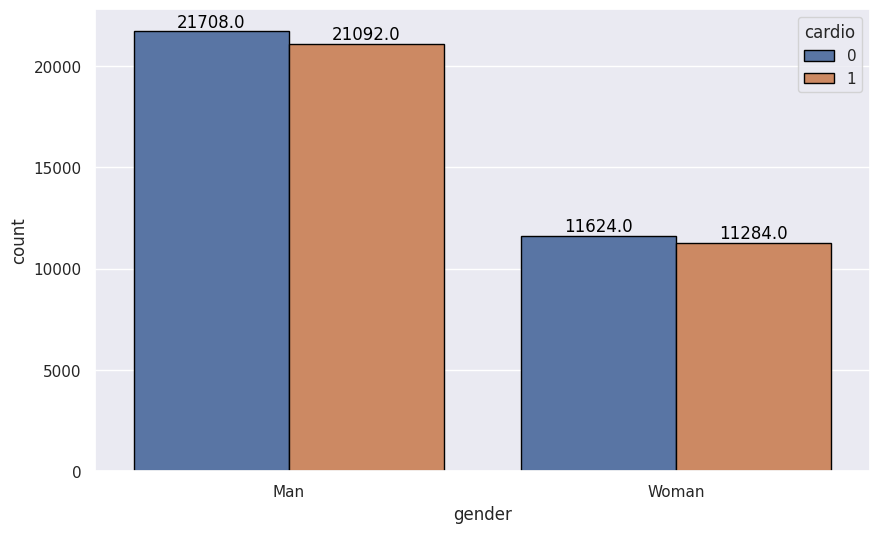

In [24]:
#Gender x Cardio - Count number by gender who have cardio disease

plt.figure(figsize=(10,6))
sns.set(font_scale = 1)

ax = sns.countplot(x='gender', hue='cardio', data=df,
                    palette='deep',
                    edgecolor='black')
# Substituir os rótulos '1' e '2' por 'Man' e 'Woman'
ax.set_xticklabels(['Man', 'Woman'])


for i in ax.patches:
    ax.annotate(i.get_height(),
               (i.get_x() + i.get_width() / 2, i.get_height()),
               ha = 'center', va = 'baseline', fontsize = 12, color = 'black',
               xytext = (0,3),
               textcoords = 'offset points')


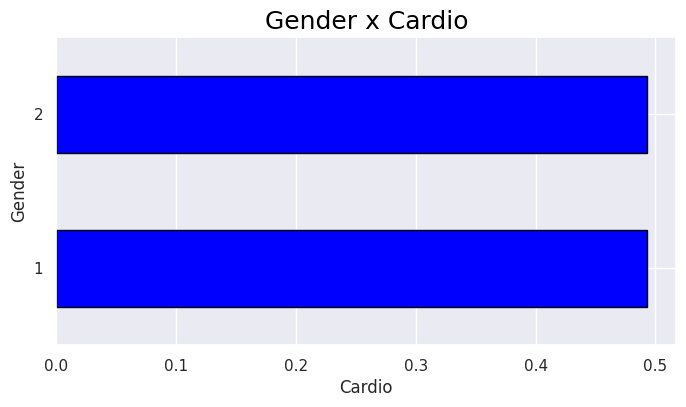

In [25]:
plt.figure(figsize=(8,4))
df.groupby('gender')['cardio'].mean().plot.barh(color = 'blue', edgecolor ='black')

plt.xlabel ('Cardio', fontsize=12)
plt.ylabel('Gender', fontsize=12)
plt.title('Gender x Cardio', fontsize = 18, color = 'black');

## 4.3 Relationship between Cholesterol and Glucose levels and Cardiovascular disease

#### **4.3.1 Cholesterol:**

  1: Normal;

  2: Above normal;

  3: Well above normal.

**As expected, there is a direct relationship in that the higher the cholesterol levels, the greater the presence of cardiovascular diseases, as we can see from the graph underneath, level 3 (well above normal) has the highest presence of patients with cardiovascular disease per sample.**

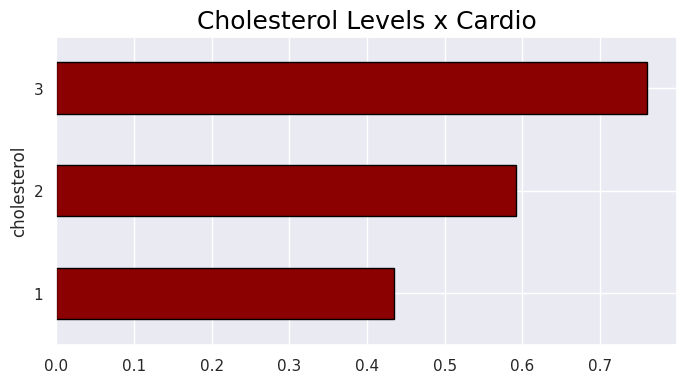

In [26]:
plt.figure(figsize=(8,4))
plt.xlabel ('Cardio', fontsize=12)
plt.ylabel('Cholesterol', fontsize=12)
plt.title('Cholesterol Levels x Cardio', fontsize = 18, color = 'black')

df.groupby('cholesterol')['cardio'].mean().plot.barh(color='darkred',
                                               edgecolor ='black');

#### **4.3.2 Glucose Levels:**
  1: Normal;

  2: Above normal;

  3: Well above normal.

**As expected, also there is a direct relationship in that the higher the Glucose levels, the greater the presence of cardiovascular diseases:**

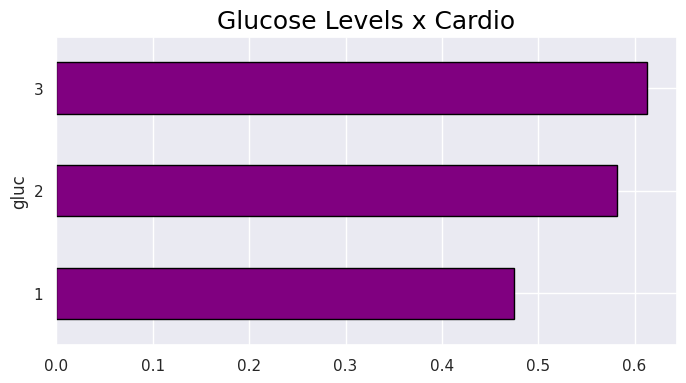

In [27]:
plt.figure(figsize=(8,4))
plt.xlabel ('Cardio', fontsize=12)
plt.ylabel('Gluc', fontsize=12)
plt.title('Glucose Levels x Cardio', fontsize = 18, color = 'black')
df.groupby('gluc')['cardio'].mean().plot.barh(color='purple',
                                               edgecolor ='black');


## 4.4 Correlation between features

In [28]:
# correlation between the data
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
age,1.000000,-0.028151,-0.092352,0.050523,0.205805,0.148482,0.153196,0.097432,-0.049924,-0.029899,-0.010597,0.236886,0.100071
gender,-0.028151,1.000000,0.521904,0.149769,0.047941,0.054308,-0.039956,-0.023213,0.337275,0.169960,0.006124,-0.000214,-0.113794
height,-0.092352,0.521904,1.000000,0.301193,0.002943,0.023128,-0.060337,-0.023617,0.194875,0.096800,-0.008390,-0.019472,-0.195545
weight,0.050523,0.149769,0.301193,1.000000,0.249314,0.228882,0.137139,0.102180,0.064978,0.064838,-0.015971,0.169294,0.872020
ap_hi,0.205805,0.047941,0.002943,0.249314,1.000000,0.698403,0.193408,0.088354,0.022254,0.029605,-0.000024,0.431903,0.254181
ap_lo,0.148482,0.054308,0.023128,0.228882,0.698403,1.000000,0.154919,0.067722,0.019669,0.030344,-0.001612,0.330567,0.223103
cholesterol,0.153196,-0.039956,-0.060337,0.137139,0.193408,0.154919,1.000000,0.451216,0.008377,0.031907,0.008721,0.219245,0.170878
gluc,0.097432,-0.023213,-0.023617,0.102180,0.088354,0.067722,0.451216,1.000000,-0.006125,0.007667,-0.007607,0.086436,0.116258
smoke,-0.049924,0.337275,0.194875,0.064978,0.022254,0.019669,0.008377,-0.006125,1.000000,0.341498,0.024614,-0.019610,-0.033048
alco,-0.029899,0.169960,0.096800,0.064838,0.029605,0.030344,0.031907,0.007667,0.341498,1.000000,0.024414,-0.011400,0.016496


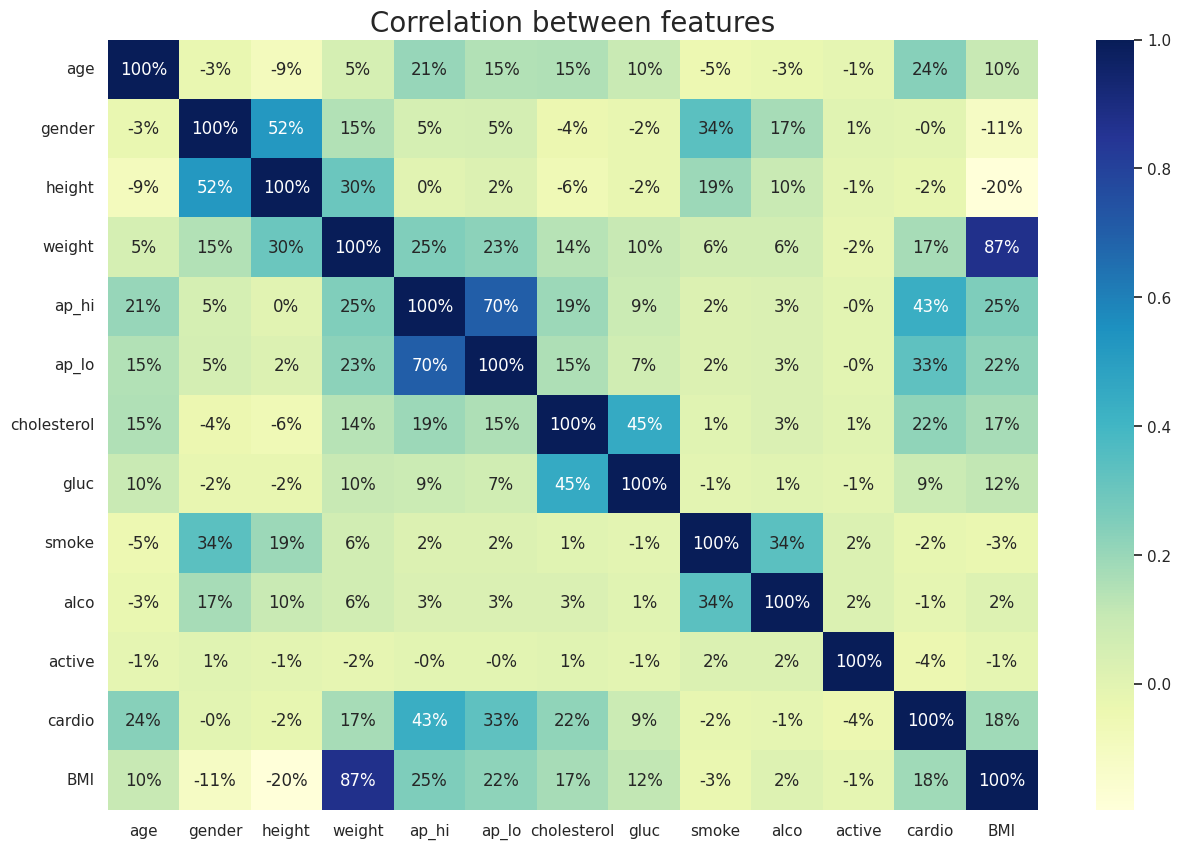

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('Correlation between features', fontsize = 20);

# 5. Machine Learning:

From now on, after performing Exploratory Data Analysis, we will demonstrate the creation of a **classification Machine Learning models** with the aim of accurately predicting, based on the variables in the dataset, **whether a patient has cardiovascular disease or not.**

For this particular problem, we will use and test **Random Forest Classifier and  Gradient Boosting Machine.**

In [30]:
from sklearn.model_selection import train_test_split

# Separating the features (independent variables) and the target (dependent variable)
x = df.drop('cardio', axis=1)  # Features
y = df['cardio']  # Target

# Train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

print(f"Train Data: {x_train.shape}, {y_train.shape}")
print(f"Test Data: {x_test.shape}, {y_test.shape}")

Train Data: (45995, 12), (45995,)
Test Data: (19713, 12), (19713,)


## 5.1 Random Forest:

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Defining Model - Random Forest
rf_model = RandomForestClassifier(random_state=10)

# Training the  model
rf_model.fit(x_train, y_train)

# Predict on training set
rf_train_predictions = rf_model.predict(x_train)

# Predict on test set
rf_test_predictions = rf_model.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score

# Calculating the accuracy of the training data
rf_accuracy_train = accuracy_score(y_train, rf_train_predictions)
print("Accuracy of training data:", rf_accuracy_train)

# Calculating the accuracy of the test data
rf_accuracy_test = accuracy_score(y_test, rf_test_predictions)
print("Accuracy of test data:", rf_accuracy_test)

Acurácia dos dados de treino: 0.9809761930644635
Acurácia dos dados de teste: 0.7061330086744788


## 5.1.1 Performing hyperparameter tuning with Randomized Search:

In [58]:
from sklearn.model_selection import RandomizedSearchCV

# Defining the hyperparameters to be evaluated
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# RandomizedSearchCV
rf_random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=5, cv=3,
                                      scoring='accuracy', refit=True, n_jobs=-1)

# Performing the Random Search
rf_random_search.fit(x_train, y_train)

# Getting the best hyperparameters
rf_best_params = rf_random_search.best_params_

# Printing the Best hyperparameters:
print("Best hyperparameters:")
print(rf_best_params)

Best hyperparameters:
{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10}


### 5.1.2 Rerunning the Random Forest model with the indicated hyperparameters:

In [59]:
from sklearn.ensemble import RandomForestClassifier

# Defining Model - Random Forest
rf_model = RandomForestClassifier(random_state=10,
                                  n_estimators=100, min_samples_split=10, min_samples_leaf=4, max_depth=10, max_features='sqrt')

# Training the  model
rf_model.fit(x_train, y_train)

# Predict on training set
rf_train_predictions = rf_model.predict(x_train)

# Predict on test set
rf_test_predictions = rf_model.predict(x_test)

In [60]:
from sklearn.metrics import accuracy_score

# Calculating the accuracy of the training data
rf_accuracy_train = accuracy_score(y_train, rf_train_predictions)
print("Accuracy of training data:", rf_accuracy_train)

# Calculating the accuracy of the test data
rf_accuracy_test = accuracy_score(y_test, rf_test_predictions)
print("Accuracy of test data:", rf_accuracy_test)

Acurácia dos dados de treino: 0.7483856940971845
Acurácia dos dados de teste: 0.7313955257951605


## 5.2 Gradient Boosting Machine (GBM):

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

# Defining Model - GBM
gbm_model = GradientBoostingClassifier(random_state=10)

# Training the model
gbm_model.fit(x_train, y_train)

# Predict on training set
gbm_train_predictions = gbm_model.predict(x_train)

# Predict on test set
gbm_test_predictions = gbm_model.predict(x_test)

In [62]:
from sklearn.metrics import accuracy_score

# Calculating the accuracy of the training data
gbm_accuracy_train = accuracy_score(y_train, gbm_train_predictions)
print("Accuracy of training data:", gbm_accuracy_train)

# Calculating the accuracy of the test data
gbm_accuracy_test = accuracy_score(y_test, gbm_test_predictions)
print("Accuracy of test data:", gbm_accuracy_test)

Acurácia dos dados de treino: 0.7313186215893032
Acurácia dos dados de teste: 0.7339826510424593


## 5.2.1 Performing hyperparameter tuning with Randomized Search:

In [63]:
# Defining the hyperparameters to be evaluated
gbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.1, 0.01, 0.001],
    'min_samples_split': [2, 5, 10],
}

# RandomizedSearchCV
gbm_random_search = RandomizedSearchCV(estimator=gbm_model, param_distributions=gbm_param_grid, n_iter=5, cv=3,
                                       scoring='accuracy', refit=True, n_jobs=-1)

# Performing the Random Search
gbm_random_search.fit(x_train, y_train)

# Getting the best hyperparameters
gbm_best_params = gbm_random_search.best_params_

# Printing the Best hyperparameters:
print("Best hyperparameters")
print(gbm_best_params)

Melhores hiperparâmetros:
{'n_estimators': 300, 'min_samples_split': 2, 'max_depth': 5, 'learning_rate': 0.01}


### 5.2.2 Rerunning the GBM model with the indicated hyperparameters:

In [64]:
# Defining Model - GBM
gbm_model = GradientBoostingClassifier(random_state=10,
                                      n_estimators = 300, min_samples_split = 2, max_depth = 5, learning_rate = 0.01)

# Training the model
gbm_model.fit(x_train, y_train)

# Predict on training set
gbm_train_predictions = gbm_model.predict(x_train)

# Predict on test set
gbm_test_predictions = gbm_model.predict(x_test)

In [65]:
# Calculating the accuracy of the training data
gbm_accuracy_train = accuracy_score(y_train, gbm_train_predictions)
print("Accuracy of training data:", gbm_accuracy_train)

# Calculating the accuracy of the test data
gbm_accuracy_test = accuracy_score(y_test, gbm_test_predictions)
print("Accuracy of the test data", gbm_accuracy_test)

Acurácia dos dados de treino: 0.7334710294597239
Acurácia dos dados de teste: 0.7336782833663065


### As we have observed, both models exhibit similar performance. However, the Random Forest model seems to be prone to overfitting.
### Also, GBM, being an ensemble model based on boosting, offers a higher level of complexity and generally demonstrates superior performance, it will be the chosen model to proceed with the project.

## 5.3 Evaluation Metrics - GBM Model:

**Accuracy Score**

In [66]:
# Calculating the accuracy of the training data
gbm_accuracy_train = accuracy_score(y_train, gbm_train_predictions)
print("Accuracy of training data:", gbm_accuracy_train)

# Calculating the accuracy of the test data
gbm_accuracy_test = accuracy_score(y_test, gbm_test_predictions)
print("Accuracy of the test data", gbm_accuracy_test)

Acurácia dos dados de treino: 0.7334710294597239
Acurácia dos dados de teste: 0.7336782833663065


**Confusion matrix:**

  A confusion matrix is an N dimensional square matrix, where N represents the total number of target classes or categories. The confusion matrix can be used to evaluate a classifier whenever the data set is unbalanced. Let's consider a binary classification problem, in other words, the number of target classes is 2. A typical confusion matrix with two target classes (say "Yes" and "No"):

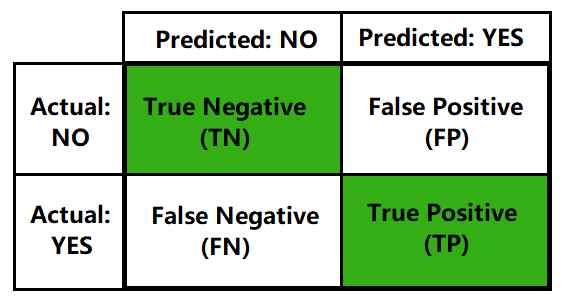

- True Positives (TP): Cases where the prediction 'YES' really belongs to the class 'YES.
- True Negatives (TN): Cases where the prediction 'NO' really belongs to class 'NO.
- False Positives (FP): Cases where the prediction 'YES' actually belongs to class 'NO. - Type 1 error
- False Negatives (FN): Cases where the prediction 'NO' actually belongs to class 'YES. - Type 2 error

[[7862 2098]
 [3152 6601]]


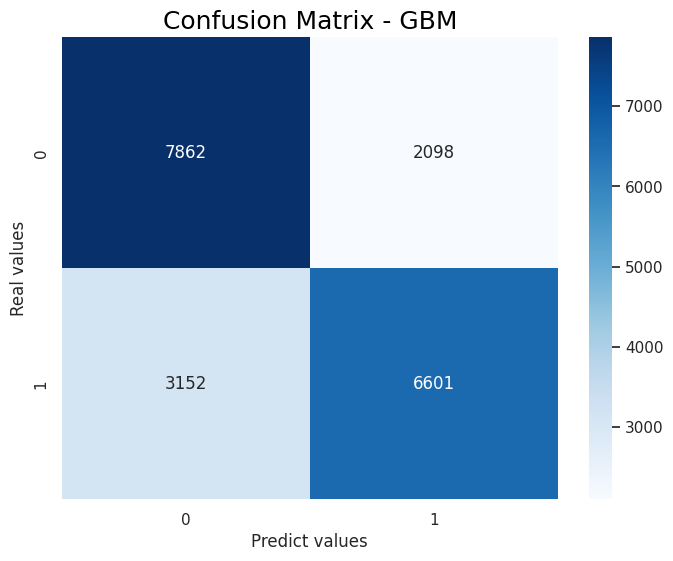

In [67]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculating the confusion matrix
rf_cm = confusion_matrix(y_test, gbm_test_predictions)
print(rf_cm)


# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - GBM', fontsize = 18, color = 'black')
plt.xlabel('Predict values')
plt.ylabel('Real values')
plt.show()

**Precision:**

In [68]:
#Precision
from sklearn.metrics import precision_score


# Calculating the Train precision score of classifier
precision_train = precision_score(y_train, gbm_train_predictions)
print("Precision of the training data:", precision_train)

# Calculating the Test precision score of classifier
precision_test = precision_score(y_test, gbm_test_predictions)
print("Precision of the test data:", precision_test)

Precision dos dados de treino: 0.7572222773751613
Precision dos dados de teste: 0.7588228532015174


In [69]:
#Sensitivy (Recall)
from sklearn.metrics import recall_score

# Calculating the Train recall score of classifier
recall_train = recall_score(y_train, gbm_train_predictions)
print("Recall of the training data:", recall_train)


# Calculating the Test recall score of classifier
recall_test = recall_score(y_test, gbm_test_predictions)
print("Recall of the test data:", recall_test)


Recall dos dados de treino: 0.6743137514918446
Recall dos dados de teste: 0.676817389521173


**F1 Score:**

In [70]:
from sklearn.metrics import f1_score

# Calculating Train F1 score of classifier
f1_train = f1_score(y_train, gbm_train_predictions)
print("F1-score of the training data:", f1_train)

# Calculating Test F1 score of classifier
f1_test = f1_score(y_test, gbm_test_predictions)
print("F1-score of the test data:", f1_test)

F1-score dos dados de treino: 0.7133671584558909
F1-score dos dados de teste: 0.7154779969650986


**AUC-ROC Curve:**

  AUC-ROC curve is a performance metric that is used to measure the performance of the classification model at different threshold values. ROC is the receiver operating characteristic curve and AUC is the area under the curve. The higher the value of AUC (Area under the curve), the better our classifier is at predicting classes. AUC-ROC is mainly used in binary classification problems.

  The ROC curve is plotted between the true positive rate (TPR) and the false positive rate (FPR), i.e. TPR on the y-axis and FPR on the x-axis. AUC is the area under the ROC curve.

**An excellent classifier has an AUC value close to 1, while a poor performing classifier has an AOC value close to 0. A classifier with an AOC score of 0.5 has no class separation capability.**



AUC for our classifier is: 0.7330874096200242


<Figure size 640x480 with 0 Axes>

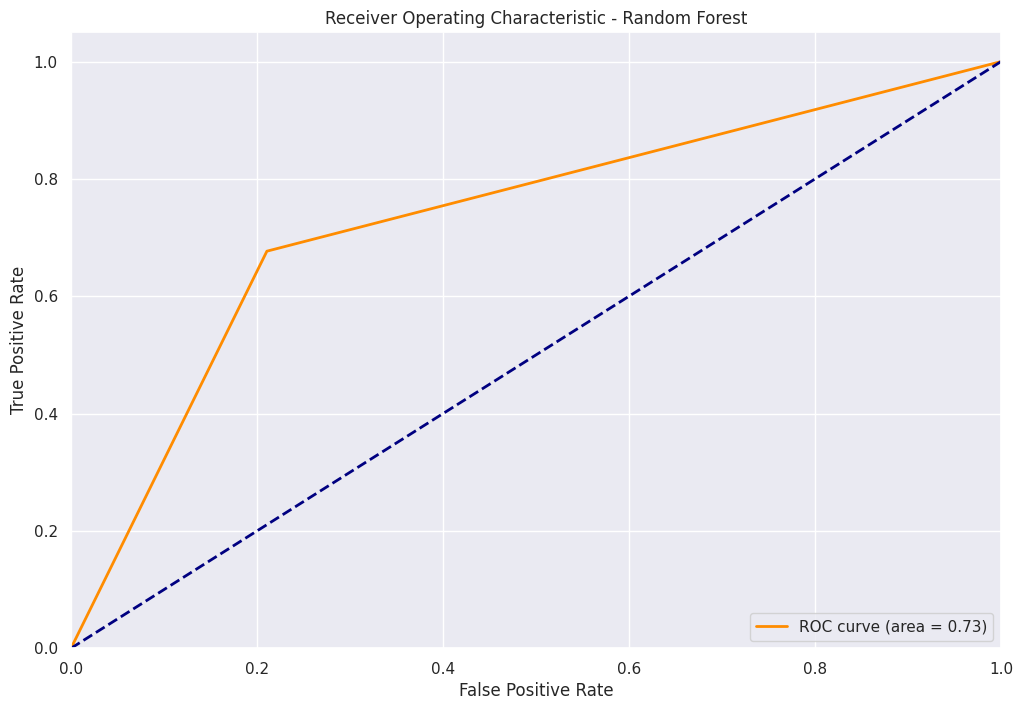

In [71]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Calculating and displaying the ROC curve for the Random Forest model
rf_probabilities = gbm_model.predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, gbm_test_predictions)
roc_auc = auc(fpr_rf, tpr_rf)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")


plt.figure()
plt.figure(figsize=(12, 8))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()

# 6. Pickle object for deploying the GBM Model using Streamlit app web

In [75]:
import pickle

# Path
file_path = '/content/drive/MyDrive/Colab Notebooks/Projetos_pessoais_DS/Cardio_vascular_project/gbm_model.pkl'

# Saving the model to a file using pickle
with open(file_path, 'wb') as file:
    pickle.dump(gbm_model, file)